In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Bar graphs
Compare categorical data, such as types of fruit or job titles. Each bar represents a data point for a category, and the length of the bar is proportional to the value it represents. Bar graphs have spaces between the bars.
Histograms
Display the frequency distribution of continuous variables, such as heights of people. Each bar represents the quantity of data points within a range, or bin, of the larger dataset. Histograms have no gaps between the bars.

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
sns.load_dataset('titanic')


SyntaxError: invalid decimal literal (<ipython-input-39-556c80f6f8a0>, line 2)

15

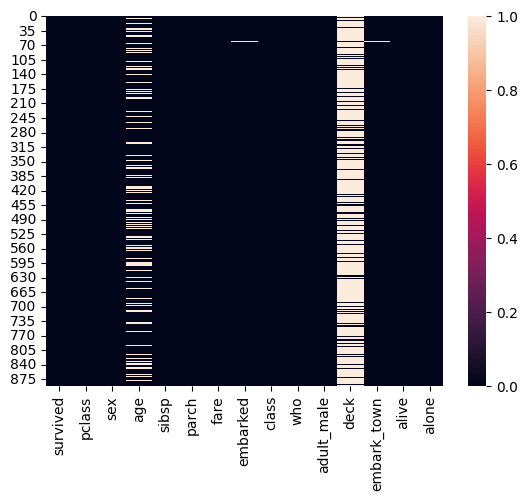

In [ ]:
df= sns.load_dataset("titanic")
sns.heatmap(df.isnull())


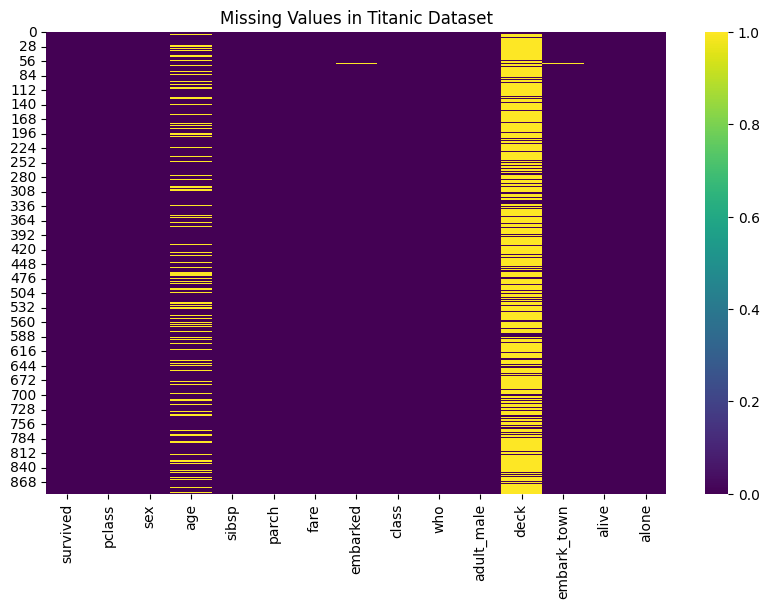

In [ ]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

Text(0, 0.5, 'Count')

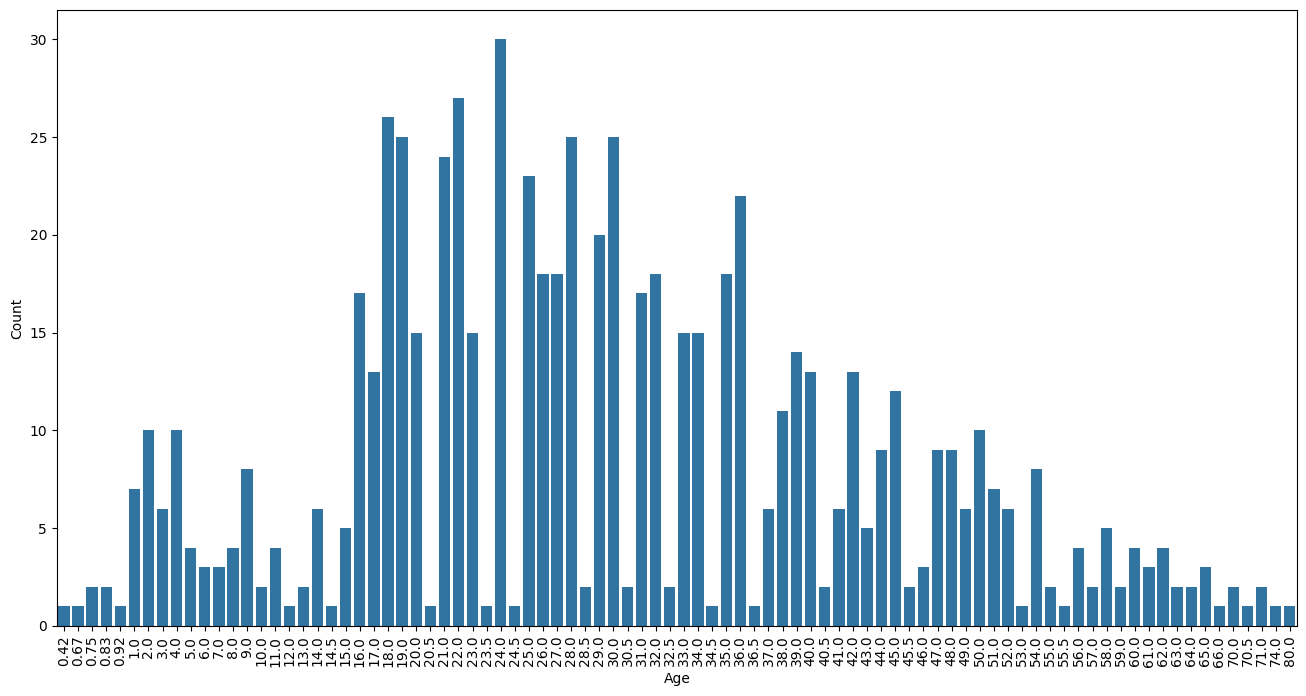

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x="age")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Count")

X-axis: Represents the age values. Each unique age value in the dataset is represented along the x-axis

Y-axis: Represents the count of individuals corresponding to each age group.

Text(0, 0.5, 'Count')

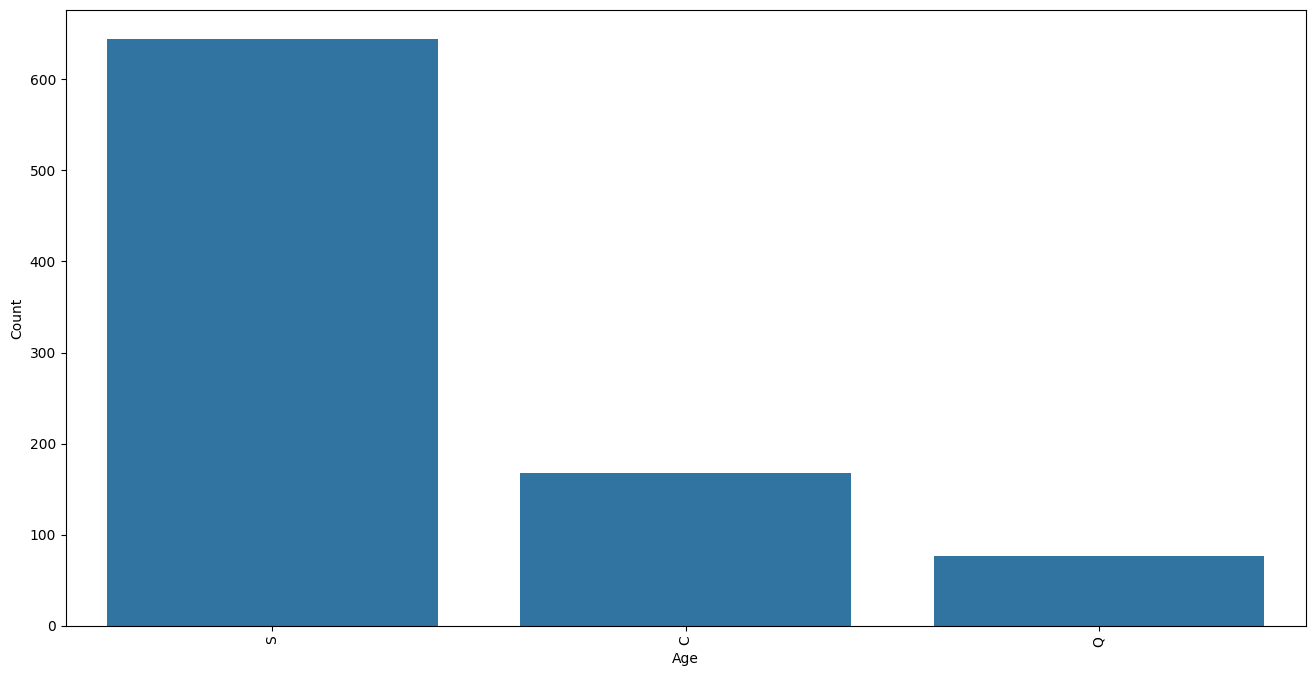

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x="embarked")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Count")

X-axis: Represents the port of embarkation. The Titanic dataset contains information about the port of embarkation, which could be "C" for Cherbourg, "Q" for Queenstown, and "S" for Southampto

Y-axis: Represents the count of passengers embarking from each port. It shows how many passengers embarked from each port

Text(0, 0.5, 'Count')

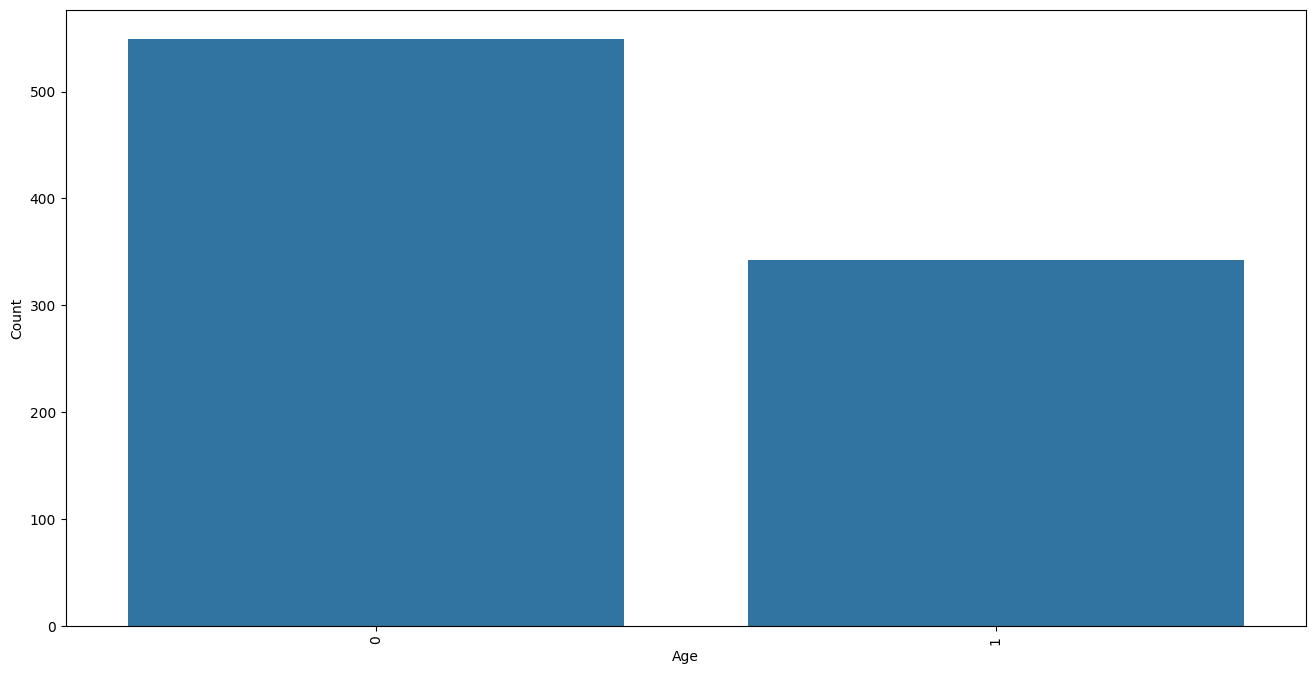

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x="survived")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Count")

X-axis: Represents the survival status of passengers. In the Titanic dataset, the "Survived" column typically contains binary values: 0 for not survived (did not survive the sinking of the Titanic) and 1 for survived (survived the sinking of the Titanic).

Y-axis: Represents the count of passengers corresponding to each survival status category. It shows how many passengers survived and how many did not.

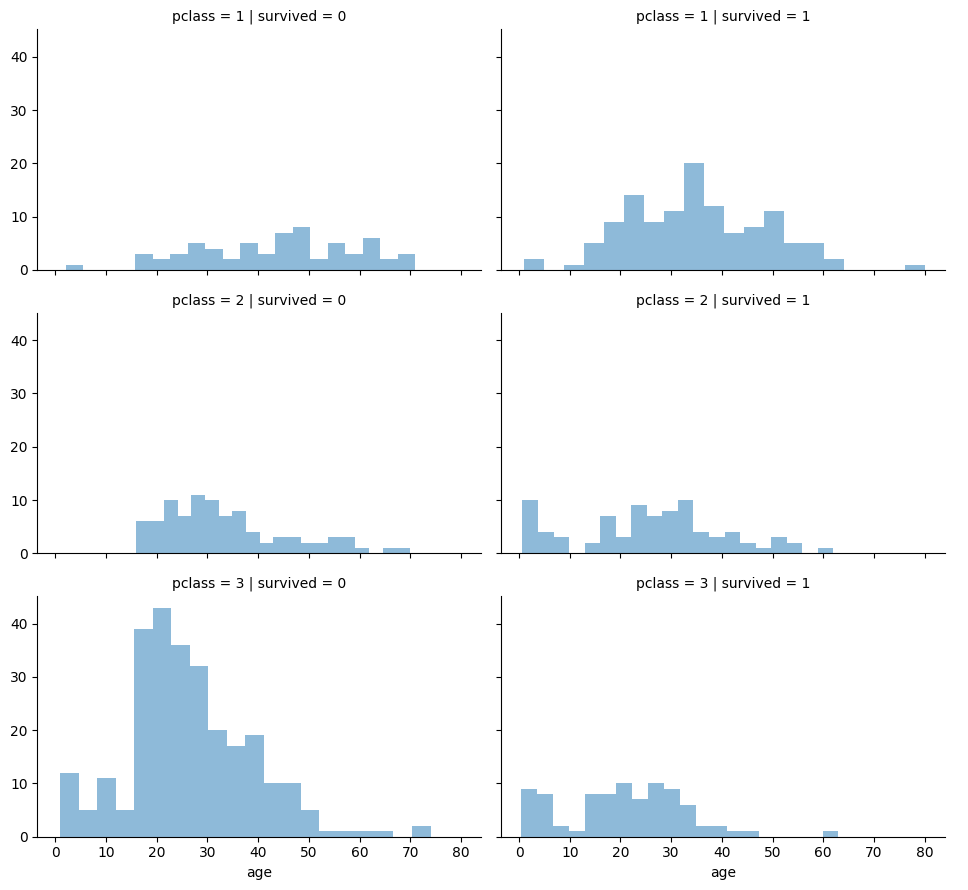

In [ ]:
# grid = sns.FacetGrid(df, col='pclass', hue='survived')
grid = sns.FacetGrid(df, col='survived', row='pclass', aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

Observations.

Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
Pclass varies in terms of Age distribution of passengers.

## Analyzing feature relation

Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

In [ ]:
df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

In [ ]:
df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.742038
1,male,0.188908


Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74%

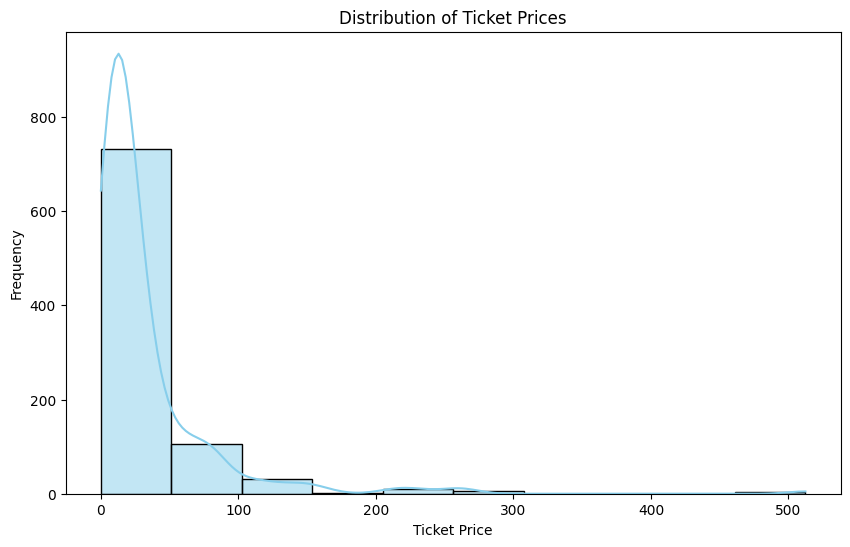

In [ ]:
# Plotting the histogram of ticket prices
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='fare', ylabel='Percent'>

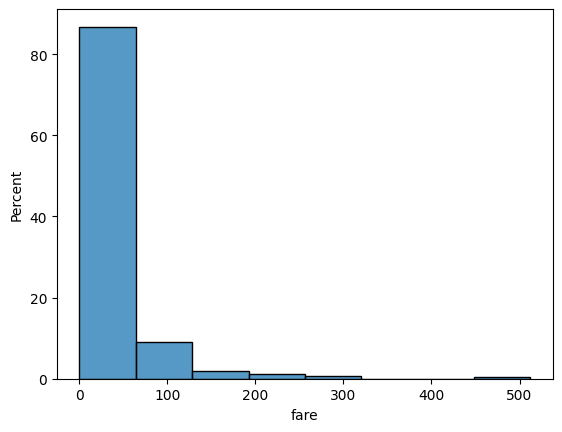

In [ ]:
sns.histplot(data=df,x="fare",stat="percent",bins=8)